# Worksheet 18

Name: SHOWNDARYA MADHAVAN
UID: U10380918

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[1, 1, 0, 1, 1]
0.15625


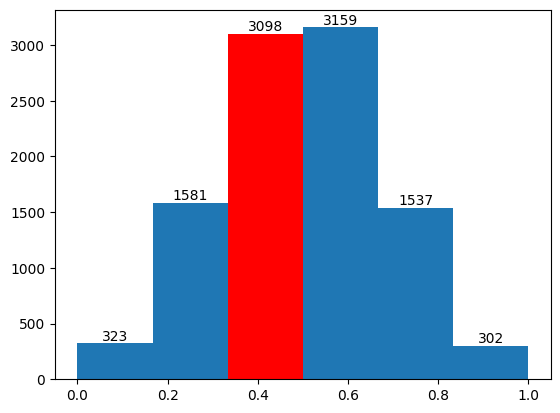

In [58]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

# SAMPLE_SIZE = 5
# flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]

def num_successes(flips):
    # count number of heads
    return sum(flips)

# print(num_successes(flips))
# # alternate hypothese -> =/= 1/2
# evidence = 0.0
# for i in range(num_successes(flips), SAMPLE_SIZE + 1):
#     evidence += 2 * binom.pmf(i, SAMPLE_SIZE, 1/2)

# print(evidence)
print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

num_iter = 10000 #1000

for _ in range(num_iter):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

[9.83914062 1.64993927]


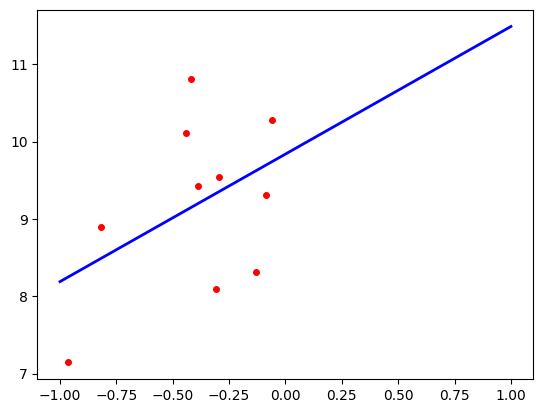

In [70]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
# y = 0.0 + np.random.randn(SAMPLE_SIZE)
y = 10.0 + 1.5 * xlin + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta)

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

0.1967


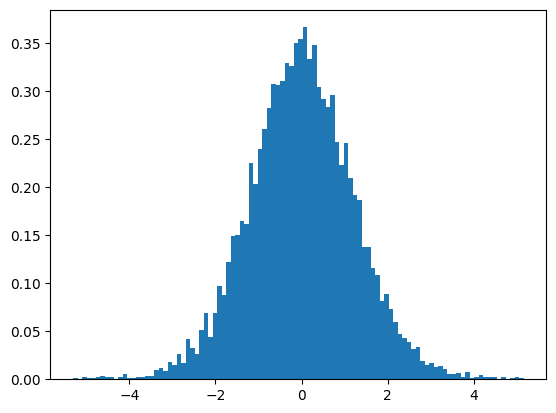

In [88]:
beta_hist = []
for _ in range(10000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta_hat[1]) # slope

beta_est = -1
count = 0
for b in beta_hist:
    if b <= beta_est:
        count += 1
print(count / len(beta_hist))

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.show()

Increase in sample size, decreases the variation of beta from 0. For smaller sample size, beta values varies between a range. The plot follows the normal distribution more closely as the sample size increases.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

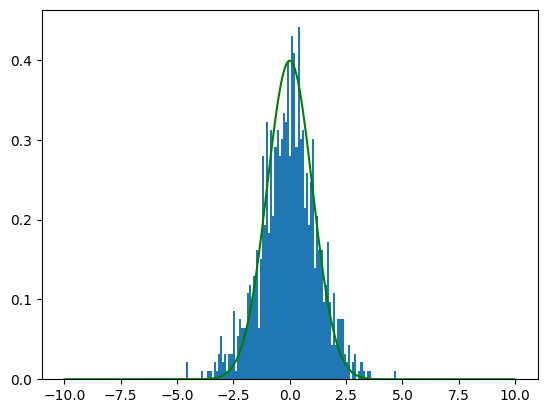

In [90]:
from scipy.stats import norm

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta_hat[1]) # slope

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

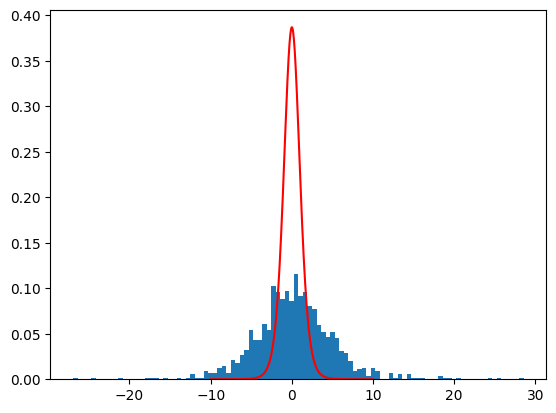

In [8]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

def standard_error(ytrue, ypred):
    return np.sqrt(np.sum((ytrue - ypred)**2) / (len(ytrue) - 2))

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_normalized = beta_hat / (standard_error(y, X @ beta_hat) * np.sqrt(np.sum((xlin - np.mean(xlin))**2) / (len(xlin) - 2)))
    beta_hist.append(beta_normalized[1]) # slope

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


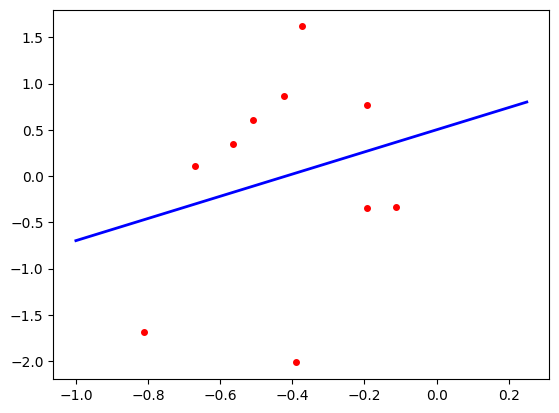

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [14]:
import scipy.stats as stats
import numpy as np

# Define the observed x-y coordinate data
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Fit a linear regression model to the data and obtain the estimated beta coefficients
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate the test statistic (in this case, the t-value)
t_value = beta_hat[1] / np.sqrt(np.diag(np.linalg.inv(X.T @ X))[1])

# Define the null hypothesis distribution (in this case, the t-distribution with n-2 degrees of freedom, where n is the sample size)
null_dist = stats.t(df=len(x)-2)

# Calculate the p-value
p_value = null_dist.cdf(t_value) if t_value < 0 else 1 - null_dist.cdf(t_value)
print(p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: there is evidence that the slope of the linear regression line is not zero")
else:
    print("Cannot reject the null hypothesis: there is no evidence that the slope of the linear regression line is not zero")


0.22325793860054954
Cannot reject the null hypothesis: there is no evidence that the slope of the linear regression line is not zero


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))


0.9949341468812443
0.9949646886607892
0.9949906395350072
0.9950599102564587
0.9951959731877941
0.9951973645980615
0.995548585675051
0.9955496895642018
0.9955607132426739
0.9957160017115791
0.9957951127603792
0.9958268712763876
0.995834899868675
0.9958397866936647
